# Neighbourhoods
### A comparative analysis of Lagos to Kigali

### Install Dependencies

In [53]:
!pip3 install bs4
!pip3 install requests
!pip3 install html5lib

### Import Dependencies
 We import Beautifulsoup dependency for web scraping of wikipedia page, requests for making http calls, html5lib a type of beautifulsoup parser for html files and pandas for working with extracted data in the form of a dataframe
 

In [55]:
import html5lib
import pandas as pd

## Data Collection - Import Files

In [57]:
cost_of_living_data = pd.read_csv("cost_of_living.csv")
neighbourhoods_data = pd.read_csv("neighbourhoods.csv")
cost_of_living_data.head()


,Goods,Kigali,Lagos,Difference
0,"Meal, Inexpensive Restaurant","3,250.00 RF\n(1,247.67 ₦)","2,474.62 RF\n(950.00 ₦)",-23.86 %
1,"Meal for 2 People, Mid-range Restaurant, Three...","37,801.43 RF\n(14,511.86 ₦)","39,072.98 RF\n(15,000.00 ₦)",0.0336
2,McMeal at McDonalds (or Equivalent Combo Meal),"6,848.39 RF\n(2,629.08 ₦)","6,512.16 RF\n(2,500.00 ₦)",-4.91 %
3,Domestic Beer (0.5 liter draught),"1,000.00 RF\n(383.90 ₦)",781.46 RF\n(300.00 ₦),-21.85 %
4,Imported Beer (0.33 liter bottle),"2,000.00 RF\n(767.79 ₦)","1,302.43 RF\n(500.00 ₦)",-34.88 %


In [59]:
neighbourhoods_data

,City,Divisions,Neighborhoods
0,Kigali,Gasabo,Bumbogo
1,Kigali,Gasabo,Gatsata
2,Kigali,Gasabo,Gikomero
3,Kigali,Gasabo,Gisozi
4,Kigali,Gasabo,Jabana
5,Kigali,Gasabo,Jali
6,Kigali,Gasabo,Kacyiru
7,Kigali,Gasabo,Kimihurura
8,Kigali,Gasabo,Kimironko
9,Kigali,Gasabo,Kinyinya


## Data Preprocessing - Convert Files into DataFrame

we need to clean the cost_of_living_data to remove the extra currencies. i decided to use the rwandan franc when comparing, therefore we will be the alternative sum in Naira.

In [61]:
def remove_unneccesary_amount (value):
    value =value.split("R")[0]
    value = value.strip()
    value = value.replace(",",'')
    value = float(value)
    return value 


In [63]:
cost_of_living_data["Kigali"]= cost_of_living_data["Kigali"].apply(remove_unneccesary_amount)
cost_of_living_data["Lagos"] = cost_of_living_data["Lagos"].apply(remove_unneccesary_amount)
cost_of_living_data.head(10)

,Goods,Kigali,Lagos,Difference
0,"Meal, Inexpensive Restaurant",3250.00,2474.62,-23.86 %
1,"Meal for 2 People, Mid-range Restaurant, Three...",37801.43,39072.98,0.0336
2,McMeal at McDonalds (or Equivalent Combo Meal),6848.39,6512.16,-4.91 %
3,Domestic Beer (0.5 liter draught),1000.00,781.46,-21.85 %
4,Imported Beer (0.33 liter bottle),2000.00,1302.43,-34.88 %
5,Cappuccino (regular),2441.80,2539.74,0.0401
6,Coke/Pepsi (0.33 liter bottle),815.80,308.86,-62.14 %
7,Water (0.33 liter bottle),588.48,202.14,-65.65 %
8,"Milk (regular), (1 liter)",662.50,3105.27,3.6872
9,Loaf of Fresh White Bread (500g),1114.58,1126.26,0.0105


we basically need to compare the amounts for kigali and lagos and not really the type of goods. so we create a new dataframe of the information we need

In [65]:
living_cost = cost_of_living_data[["Kigali","Lagos"]]
living_cost.head()

,Kigali,Lagos
0,3250.00,2474.62
1,37801.43,39072.98
2,6848.39,6512.16
3,1000.00,781.46
4,2000.00,1302.43


Likewise we process the neighbourhoods data adding the longitude and latitude of each area to the csv file and saving it for future reuse

In [67]:
from geopy.geocoders import Nominatim

In [69]:
def get_location_data(value):
    geolocator = Nominatim(user_agent="ny_explorer")
    location = geolocator.geocode(value)
    if location is not None: 
        latitude = location.latitude
        longitude = location.longitude
        return latitude, longitude
    return None, None
  


In [71]:

new_cols =["Latitude","Longitude"]  
for n,col in enumerate(new_cols):
       neighbourhoods_data[col] = neighbourhoods_data[['Neighborhoods','City']].agg(",".join, axis =1).apply(lambda x: get_location_data(x)[n])
neighbourhoods_data[neighbourhoods_data["Latitude"].isnull()]["Latitude"].value_counts()




Series([], Name: Latitude, dtype: int64)

In [73]:
not_found_coordinates = pd.read_csv("Missing_Coordinates.csv")
not_found_coordinates

,Neighborhoods,Latitude,Longitude
0,Jabana,-1.865300,30.055000
1,Gikomero,-1.878800,30.239700
2,Nduba,-1.847000,30.124300
3,Rutunga,-1.845700,30.193600
4,Mageragere,-2.025258,30.024313
5,Nyakabanda,-1.965600,30.046300
6,Rwezamenyo,-1.970800,30.053500
7,Niboye,-1.977000,30.115600
8,Nyarugunga,-1.978100,30.164700
9,Kigarama,-1.997300,30.060700


In [75]:
neighbourhoods_data.set_index("Neighborhoods", inplace=True)
not_found_coordinates.set_index("Neighborhoods", inplace=True)

In [77]:
neighbourhoods_data

,City,Divisions,Latitude,Longitude
Neighborhoods,,,,
Bumbogo,Kigali,Gasabo,-1.878432,30.157012
Gatsata,Kigali,Gasabo,-1.896416,30.056886
Gikomero,Kigali,Gasabo,NaN,NaN
Gisozi,Kigali,Gasabo,-1.916418,30.087968
Jabana,Kigali,Gasabo,NaN,NaN
Jali,Kigali,Gasabo,-1.883270,30.015570
Kacyiru,Kigali,Gasabo,-1.936861,30.078766
Kimihurura,Kigali,Gasabo,-1.952833,30.081753
Kimironko,Kigali,Gasabo,-1.942618,30.138202


In [79]:

for val in not_found_coordinates.index:
    neighbourhoods_data.loc[val,["Latitude","Longitude"]] = not_found_coordinates.loc[val,["Latitude", "Longitude"]]
neighbourhoods_data.reset_index(inplace=True)
neighbourhoods_data[neighbourhoods_data["Latitude"].isnull()]


,Neighborhoods,City,Divisions,Latitude,Longitude


In [81]:
neighbourhoods_data = neighbourhoods_data[[neighbourhoods_data.columns[1]] +[neighbourhoods_data.columns[2]]  + [neighbourhoods_data.columns[0]]+ list(neighbourhoods_data.columns[3:])]
neighbourhoods_data

,City,Divisions,Neighborhoods,Latitude,Longitude
0,Kigali,Gasabo,Bumbogo,-1.878432,30.157012
1,Kigali,Gasabo,Gatsata,-1.896416,30.056886
2,Kigali,Gasabo,Gikomero,-1.878800,30.239700
3,Kigali,Gasabo,Gisozi,-1.916418,30.087968
4,Kigali,Gasabo,Jabana,-1.865300,30.055000
5,Kigali,Gasabo,Jali,-1.883270,30.015570
6,Kigali,Gasabo,Kacyiru,-1.936861,30.078766
7,Kigali,Gasabo,Kimihurura,-1.952833,30.081753
8,Kigali,Gasabo,Kimironko,-1.942618,30.138202
9,Kigali,Gasabo,Kinyinya,-1.918003,30.112367


we see that all areas now have latitude and longitude.

### Get the Latitude and Longitude based on Postal Codes

## Exploring Cost Of Living
  
We want to analyze the cost of living in Lagos vs Kigali to understand trends in price distribution and understand which area is more costly to live in. We would be using a normal independent t-test to check if there is a significant difference between living in Lagos and living in Kigali. Also a correlation analysis to see if price are distributed in the same order for both Kigali and Lagos.

In [83]:
import seaborn as sns
from scipy import stats
from sklearn import preprocessing
import matplotlib.pyplot as plt
%matplotlib inline 
import plotly.express as px

### first we create a box plot to check if location causes significant difference in price trend

<AxesSubplot:xlabel='Location', ylabel='Prices'>

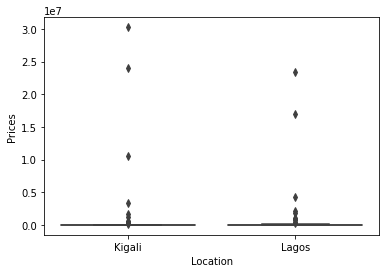

In [85]:
kigali_prices = living_cost[["Kigali"]]
kigali_prices["Location"] = "Kigali"
kigali_prices.rename(columns={'Kigali': "Prices"}, inplace=True)
lagos_prices = living_cost[["Lagos"]]
lagos_prices["Location"] = "Lagos"
lagos_prices.rename(columns={'Lagos': "Prices"}, inplace=True)
result = pd.concat([kigali_prices, lagos_prices])
# scaler =preprocessing.StandardScaler()
# result['Prices']= scaler.fit_transform(result[["Prices"]])
sns.boxplot(x= "Location", y="Prices", data=result)

The boxplot shows that the trend of prices for products are significantly similiar for both lagos and Kigali, therefore the meal for two persons would be more expensive than the meal for one person in Kigali as it is in Lagos. Therefore location has no significant effect on trends of product prices

In [87]:
living_cost[['Kigali','Lagos']].corr()

,Kigali,Lagos
Kigali,1.000000,0.546907
Lagos,0.546907,1.000000


In [89]:
pearson_coef, p_value = stats.pearsonr(living_cost['Lagos'], living_cost['Kigali'])
pearson_coef

0.546907450117586

We see that the trend of prices in both cities are correlated but not strongly. A final independent T-test we help us understand if there is a significant difference though in the cost of living in Kigali versus Lagos

In [91]:
stats.ttest_ind(living_cost["Kigali"], living_cost["Lagos"], equal_var=False)

Ttest_indResult(statistic=0.4233273741265169, pvalue=0.6729757117546021)

A large pValue of 0.6729 shows that we cannot reject the null hypothesis of identical means. Therefore there is no significant difference between the cost average cost of living in Lagos and that of Kigali.

## Exploring Similarities (Areas/Neighbourhoods)
 Having seen that there is no siginificant difference in the cost of living in both cities, we explore areas and neighbourhoods to find  similarities between them 

We install and import the neccessary packages for our exploration

In [93]:
from geopy.geocoders import Nominatim
from sklearn.cluster import KMeans
import json
import matplotlib.colors as colors
import matplotlib.cm as cm
import folium
import requests

In [95]:

def get_coordinates(place):
    geolocator = Nominatim(user_agent="ny_explorer")
    location = geolocator.geocode(place)
    latitude = location.latitude
    longitude = location.longitude
    print('The geograpical coordinate of Republic of Congo are {}, {}.'.format(latitude, longitude))
    return (latitude,longitude)



### Map of Cities with its neighbourhoods superimposed on it.

In [97]:
# we use a place that is at the middle of both Nigeria and Rwanda so we can easily represent both places on the map
cities_map = folium.Map(location=get_coordinates("Republic of Congo"), zoom_start=5)
for lat, lng, label in zip(neighbourhoods_data['Latitude'], neighbourhoods_data['Longitude'], neighbourhoods_data['Neighborhoods']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(cities_map)
cities_map

The geograpical coordinate of Republic of Congo are -0.7179165000000001, 16.018048574081842.


### Using Forsquare API
using foursquare api, we collect data about places nearby to a specific longitude and latitude

In [99]:
CLIENT_ID = '************Your Foursquare Api ***************' # your Foursquare ID
CLIENT_SECRET = '********************Your Client Secret. ************' # your Foursquare Secret
ACCESS_TOKEN = "************Your Acess Token ****************" # your FourSquare Access Token
VERSION = '20180605' # Foursquare API version
LIMIT = 100

Let explore the neighbourhoods by getting the top nearby venues for each neighbourhood in north york. 

In [101]:

def getNearbyVenues(city, names, latitudes, longitudes, radius=1000):
    
    venues_list=[]
    for city_name, name, lat, lng in zip(city, names, latitudes, longitudes):
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]
        print(results)
        results = results['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            city_name,
            name, 
            lat, 
            lng, 
            venue['venue']['name'], 
            venue['venue']['location']['lat'], 
            venue['venue']['location']['lng'],  
            venue['venue']['categories'][0]['name']) for venue in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ["City",'Neighborhoods',
                  'Neighborhoods Latitude', 
                  'Neighborhoods Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)
        

In [102]:
nearby_venues = getNearbyVenues(neighbourhoods_data["City"], neighbourhoods_data["Neighborhoods"], neighbourhoods_data["Latitude"], neighbourhoods_data["Longitude"]);



{'warning': {'text': "There aren't a lot of results near you. Try something more general, reset your filters, or expand the search area."}, 'headerLocation': 'Current map view', 'headerFullLocation': 'Current map view', 'headerLocationGranularity': 'unknown', 'totalResults': 0, 'suggestedBounds': {'ne': {'lat': -1.869431990999991, 'lng': 30.165999934891246}, 'sw': {'lat': -1.8874320090000092, 'lng': 30.148023865108755}}, 'groups': [{'type': 'Recommended Places', 'name': 'recommended', 'items': []}]}
{'warning': {'text': "There aren't a lot of results near you. Try something more general, reset your filters, or expand the search area."}, 'headerLocation': 'Current map view', 'headerFullLocation': 'Current map view', 'headerLocationGranularity': 'unknown', 'totalResults': 1, 'suggestedBounds': {'ne': {'lat': -1.887415990999991, 'lng': 30.065874227859492}, 'sw': {'lat': -1.9054160090000092, 'lng': 30.047897972140508}}, 'groups': [{'type': 'Recommended Places', 'name': 'recommended', 'item

Let split the nearby_venues into two sets for Kigali and Lagos since we are trying to compare both cities

In [103]:
nearby_venues_lagos = nearby_venues[nearby_venues['City'] == "Lagos"]
nearby_venues_kigali = nearby_venues[nearby_venues['City'] == "Kigali"]

In [104]:
nearby_venues_kigali

,City,Neighborhoods,Neighborhoods Latitude,Neighborhoods Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Kigali,Gatsata,-1.896416,30.056886,Bar Terminus,-1.903279,30.052434,Bar
1,Kigali,Gisozi,-1.916418,30.087968,landmark apartments,-1.911289,30.081996,Hotel
2,Kigali,Gisozi,-1.916418,30.087968,Sittin On Da Toilet,-1.911384,30.087188,Brewery
3,Kigali,Gisozi,-1.916418,30.087968,Peponi living spaces,-1.911587,30.083347,Hotel
4,Kigali,Gisozi,-1.916418,30.087968,Gato keza,-1.924660,30.090841,Café
5,Kigali,Kacyiru,-1.936861,30.078766,Shokola,-1.934737,30.078809,Coffee Shop
6,Kigali,Kacyiru,-1.936861,30.078766,Brachetto,-1.941714,30.083587,Italian Restaurant
7,Kigali,Kacyiru,-1.936861,30.078766,Kilgali Public Library,-1.934691,30.078685,Museum
8,Kigali,Kacyiru,-1.936861,30.078766,Japanda,-1.941141,30.078092,Japanese Restaurant
9,Kigali,Kacyiru,-1.936861,30.078766,NeXt,-1.941035,30.071717,Nightclub


In [105]:
nearby_venues_lagos

,City,Neighborhoods,Neighborhoods Latitude,Neighborhoods Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
157,Lagos,Amuwo,6.469861,3.295815,Pool Golden Tulip,6.465255,3.302554,Pool
158,Lagos,Amuwo,6.469861,3.295815,Big treat festac,6.463414,3.299766,Bakery
159,Lagos,Amuwo,6.469861,3.295815,Shop Direct,6.466141,3.298878,Department Store
160,Lagos,Amuwo,6.469861,3.295815,Mr Biggs,6.463395,3.299701,Snack Place
161,Lagos,Amuwo,6.469861,3.295815,"HitRash Studio, Naid Bus Stop, Old Ojo Road",6.463417,3.299777,Music Venue
162,Lagos,Amuwo,6.469861,3.295815,The Jetty,6.463386,3.299814,Boat or Ferry
163,Lagos,Amuwo,6.469861,3.295815,Golden Tulip Fitness Centre,6.465411,3.302521,Gym
164,Lagos,Odofin,6.447023,3.266280,Golden Tulip Festac Lagos,6.449725,3.269596,Hotel
165,Lagos,Odofin,6.447023,3.266280,Destiny Suites,6.448511,3.270006,Hotel
166,Lagos,Odofin,6.447023,3.266280,Grocery Bazaar,6.450635,3.267022,Department Store


In [106]:

nearby_venues_kigali.groupby("Neighborhoods").count().sort_values(["City"], ascending=False).head(10)



,City,Neighborhoods Latitude,Neighborhoods Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhoods,,,,,,,
Nyarugenge,28,28,28,28,28,28,28
Kigali,28,28,28,28,28,28,28
Remera,18,18,18,18,18,18,18
Kimihurura,13,13,13,13,13,13,13
Nyamirambo,10,10,10,10,10,10,10
Gitega,8,8,8,8,8,8,8
Rwezamenyo,5,5,5,5,5,5,5
Kacyiru,5,5,5,5,5,5,5
Kicukiro,5,5,5,5,5,5,5


In [107]:
nearby_venues_lagos.groupby("Neighborhoods").count().sort_values(["City"], ascending=False).head(10)

,City,Neighborhoods Latitude,Neighborhoods Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhoods,,,,,,,
Victoria Island,75,75,75,75,75,75,75
Iru,33,33,33,33,33,33,33
Oto-Awori,25,25,25,25,25,25,25
Surulere,19,19,19,19,19,19,19
Onigbongbo,18,18,18,18,18,18,18
Marina,17,17,17,17,17,17,17
Lagos Island,16,16,16,16,16,16,16
Broad street,16,16,16,16,16,16,16
Odi-Olowo,16,16,16,16,16,16,16


In [108]:
# one of the neighborhoods in north york have no nearby places with a 500m range

## Analyzing Neighbourhoods
To be able to use this information for clustering we create dummy variables for each category

In [109]:
import numpy as np

In [110]:

# add neighborhood column back to dataframe
def analyse_neighbourhood(city_venues, num_top_venues):
    neighbourhood_dummies = pd.get_dummies(city_venues[['Venue Category']], prefix="", prefix_sep="")
    neighbourhood_dummies['Neighborhoods'] = city_venues['Neighborhoods'] 
# move neighborhood column to the first column

    fixed_columns = [neighbourhood_dummies.columns[-1]] + list(neighbourhood_dummies.columns[:-1])
    neighbourhood_dummies = neighbourhood_dummies[fixed_columns]
    neighbourhood_grouped = neighbourhood_dummies.groupby("Neighborhoods").mean().reset_index()
    columns = ["Neighborhoods"]
    indicators = ['st', 'nd', 'rd']
    for ind in np.arange(num_top_venues):
        try:
            columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
        except:
            columns.append('{}th Most Common Venue'.format(ind+1))
    neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
    neighborhoods_venues_sorted['Neighborhoods'] = neighbourhood_grouped['Neighborhoods']
    for ind in np.arange(neighbourhood_grouped.shape[0]):
        neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(neighbourhood_grouped.iloc[ind, :], num_top_venues)
      
    return neighbourhood_grouped, neighborhoods_venues_sorted


def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    categories_list=[]
    count = 0
    for x in row_categories_sorted:
        if x > 0.0:
            categories_list.extend(row_categories_sorted.index.values[count:count+1])
        else:
            categories_list.extend([np.NaN])
        count= count+1
    return categories_list[0: num_top_venues]



Lets print 10 top venues for Lagos neighborhoods

In [111]:
_,top_10_venues_in_lagos = analyse_neighbourhood( nearby_venues_lagos, 10)
top_10_venues_in_lagos

,Neighborhoods,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Agbado,Snack Place,Soccer Field,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Agboyi,Hotel,Fast Food Restaurant,Beer Garden,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Agege,Campground,Gym,Bus Station,Market,Fast Food Restaurant,NaN,NaN,NaN,NaN,NaN
3,Aguda,Fast Food Restaurant,Ice Cream Shop,Theater,Beer Garden,Field,Candy Store,Food Court,BBQ Joint,Chinese Restaurant,Performing Arts Venue
4,Ajah,Shopping Mall,Bus Station,Convenience Store,Farmers Market,Baseball Stadium,Sushi Restaurant,Spa,Pharmacy,Vegetarian / Vegan Restaurant,NaN
5,Akowonjo,Bus Station,Fast Food Restaurant,Mobile Phone Shop,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Alimosho,Bar,Soccer Field,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Amuwo,Gym,Bakery,Music Venue,Snack Place,Boat or Ferry,Department Store,Pool,NaN,NaN,NaN
8,Apapa,Bank,Shopping Mall,Hotel,Boat or Ferry,Fast Food Restaurant,Department Store,Pharmacy,Playground,Plaza,Chinese Restaurant
9,Badagry,Hotel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Also we get top 10 venues in Kigali

In [112]:
_,top_10_venues_in_kigali = analyse_neighbourhood( nearby_venues_kigali, 10)
top_10_venues_in_kigali

,Neighborhoods,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Gahanga,Bus Station,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Gatenga,History Museum,Pharmacy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Gatsata,Bar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Gikondo,Fast Food Restaurant,Clothing Store,Grocery Store,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Gisozi,Hotel,Brewery,Café,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Gitega,Hotel,African Restaurant,Italian Restaurant,Bakery,Pizza Place,NaN,NaN,NaN,NaN,NaN
6,Kacyiru,Italian Restaurant,Japanese Restaurant,Museum,Nightclub,Coffee Shop,NaN,NaN,NaN,NaN,NaN
7,Kagarama,Garden,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Kanombe,Park,Hotel,Bakery,Beer Bar,NaN,NaN,NaN,NaN,NaN,NaN
9,Kicukiro,Bar,IT Services,Hotel,Bagel Shop,NaN,NaN,NaN,NaN,NaN,NaN


### Get Most Common Places

In [113]:
# get the unique list of most_common_places in all neigh
def get_most_common_place(neighborhoods_venues_sorted,val):
    common_places_list = [venue for venues in neighborhoods_venues_sorted.iloc[:,val:].to_numpy() for venue in venues if str(venue) != 'nan' and str(venue)!=""]
    common_venues = pd.Series(np.array(common_places_list)).value_counts()
    most_common_venues = common_venues.to_frame()
    most_common_venues.reset_index(inplace =True)
    most_common_venues.columns = ["Venues","Count"]
    return most_common_venues

In [114]:
most_common_venues_in_lagos = get_most_common_place(top_10_venues_in_lagos ,1)
Ten_most_common_venues_in_lagos = most_common_venues_in_lagos.head(10)
Ten_most_common_venues_in_lagos

,Venues,Count
0,Bus Station,20
1,Hotel,20
2,Fast Food Restaurant,19
3,Bar,14
4,Shopping Mall,11
5,Department Store,9
6,Bank,8
7,Lounge,8
8,Flea Market,8
9,Pharmacy,8


Likewise we get 10 most common places in Kigali

In [115]:
most_common_venues_in_kigali = get_most_common_place(top_10_venues_in_kigali ,1)
Ten_most_common_venues_in_kigali = most_common_venues_in_kigali.head(10)
Ten_most_common_venues_in_kigali

,Venues,Count
0,Hotel,11
1,Café,5
2,African Restaurant,5
3,Bar,4
4,Grocery Store,4
5,Coffee Shop,4
6,Convenience Store,4
7,Italian Restaurant,3
8,Bus Station,3
9,Pizza Place,3


## Clustering Neighborhoods

We want to cluster similiar neighbourhoods in both lagos and kigali. We use K-means Clustering method, an unspervised machine learning method to know cluster these neighbourhoods.

First we determine the number of clusters that is the best fit for clustering the neighbourhoods

In [116]:
neighbourhood_grouped,neighborhoods_venues_sorted = analyse_neighbourhood(nearby_venues,10)
neighborhoods_venues_sorted


,Neighborhoods,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Agbado,Soccer Field,Snack Place,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Agboyi,Beer Garden,Hotel,Fast Food Restaurant,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Agege,Bus Station,Gym,Campground,Fast Food Restaurant,Market,NaN,NaN,NaN,NaN,NaN
3,Aguda,Fast Food Restaurant,Ice Cream Shop,Performing Arts Venue,Food Court,Chinese Restaurant,BBQ Joint,Theater,Candy Store,Beer Garden,Field
4,Ajah,Shopping Mall,Bus Station,Convenience Store,Spa,Vegetarian / Vegan Restaurant,Pharmacy,Farmers Market,Sushi Restaurant,Baseball Stadium,NaN
5,Akowonjo,Bus Station,Mobile Phone Shop,Fast Food Restaurant,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Alimosho,Bar,Soccer Field,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Amuwo,Department Store,Pool,Music Venue,Snack Place,Bakery,Boat or Ferry,Gym,NaN,NaN,NaN
8,Apapa,Bank,Shopping Mall,Plaza,Playground,Indian Restaurant,Chinese Restaurant,Fast Food Restaurant,Boat or Ferry,Pharmacy,Department Store
9,Badagry,Hotel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [117]:
neighbourhood_clustering_data = neighbourhood_grouped.drop("Neighborhoods", 1)

In [118]:
inertia = []
K = range(1,12)
for k in K:
    kmeans = KMeans(n_clusters=k, init="k-means++").fit(neighbourhood_clustering_data)
    inertia.append(kmeans.inertia_) 

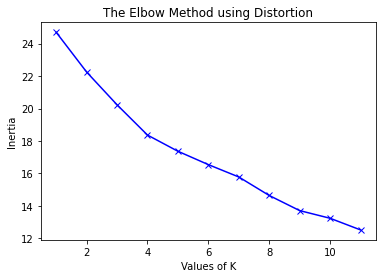

In [119]:
plt.plot(K, inertia, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Distortion')
plt.show()

so we use K = 3 as our number of clusters


In [120]:
kmeans = KMeans( n_clusters = 4, init="k-means++").fit(neighbourhood_clustering_data)
if 'Cluster Labels' in neighborhoods_venues_sorted.columns:
    del neighborhoods_venues_sorted["Cluster Labels"]
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
ny_merged = neighbourhoods_data

ny_merged = ny_merged.join(neighborhoods_venues_sorted.set_index('Neighborhoods'), on='Neighborhoods')

# remove the neighborhood without any nearby venues
# ny_merged.dropna(inplace=True, )
ny_merged.drop(ny_merged[ny_merged["Cluster Labels"].isna()].index, inplace=True)
ny_merged
ny_merged["Cluster Labels"] = ny_merged["Cluster Labels"].astype(int)
ny_merged.reset_index(drop=True, inplace=True)
ny_merged.replace(np.NaN, '', inplace=True)
ny_merged

,City,Divisions,Neighborhoods,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Kigali,Gasabo,Gatsata,-1.896416,30.056886,1,Bar,,,,,,,,,
1,Kigali,Gasabo,Gisozi,-1.916418,30.087968,2,Hotel,Café,Brewery,,,,,,,
2,Kigali,Gasabo,Kacyiru,-1.936861,30.078766,0,Museum,Coffee Shop,Italian Restaurant,Japanese Restaurant,Nightclub,,,,,
3,Kigali,Gasabo,Kimihurura,-1.952833,30.081753,0,Bar,Lounge,French Restaurant,Smoothie Shop,Burger Joint,Sports Bar,Café,Gym / Fitness Center,Nightclub,Ethiopian Restaurant
4,Kigali,Gasabo,Kimironko,-1.942618,30.138202,2,Moving Target,Hotel,,,,,,,,
5,Kigali,Gasabo,Kinyinya,-1.918003,30.112367,0,Convenience Store,Thai Restaurant,,,,,,,,
6,Kigali,Gasabo,Remera,-1.951500,30.109800,2,Hotel,Italian Restaurant,Thai Restaurant,Coffee Shop,Café,North Indian Restaurant,Soccer Stadium,Bed & Breakfast,Lounge,Tennis Court
7,Kigali,Nyarugenge,Gitega,-1.961205,30.060482,2,Hotel,African Restaurant,Pizza Place,Italian Restaurant,Bakery,,,,,
8,Kigali,Nyarugenge,Kigali,-1.950851,30.061507,2,Hotel,Grocery Store,Coffee Shop,African Restaurant,Building,Indian Restaurant,Juice Bar,Hotel Bar,Men's Store,Miscellaneous Shop
9,Kigali,Nyarugenge,Kimisagara,-1.948662,30.050964,2,Grocery Store,Warehouse Store,Hotel,Bus Station,,,,,,


In [121]:
map_clusters = folium.Map(location=get_coordinates("Republic of Congo"), zoom_start=5)
kclusters =4
# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(ny_merged['Latitude'], ny_merged['Longitude'], ny_merged['Neighborhoods'], ny_merged
['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

The geograpical coordinate of Republic of Congo are -0.7179165000000001, 16.018048574081842.


In [122]:
first_cluster =ny_merged.loc[ny_merged['Cluster Labels'] == 0, ny_merged.columns[[0]+[2] + list(range(5, ny_merged.shape[1]))]]
first_cluster

,City,Neighborhoods,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Kigali,Kacyiru,0,Museum,Coffee Shop,Italian Restaurant,Japanese Restaurant,Nightclub,,,,,
3,Kigali,Kimihurura,0,Bar,Lounge,French Restaurant,Smoothie Shop,Burger Joint,Sports Bar,Café,Gym / Fitness Center,Nightclub,Ethiopian Restaurant
5,Kigali,Kinyinya,0,Convenience Store,Thai Restaurant,,,,,,,,
11,Kigali,Nyakabanda,0,Convenience Store,Café,Fish & Chips Shop,,,,,,,
12,Kigali,Nyamirambo,0,African Restaurant,Market,Art Gallery,Hotel,Convenience Store,Pub,Historic Site,Gym,Office,
16,Kigali,Kagarama,0,Garden,,,,,,,,,
18,Kigali,Gatenga,0,Pharmacy,History Museum,,,,,,,,
19,Kigali,Gikondo,0,Fast Food Restaurant,Clothing Store,Grocery Store,,,,,,,
22,Kigali,Nyarugunga,0,Pub,,,,,,,,,
23,Kigali,Masaka,0,Park,Lounge,,,,,,,,


In [123]:
second_cluster =ny_merged.loc[ny_merged['Cluster Labels'] == 1, ny_merged.columns[[0]+[2] + list(range(5, ny_merged.shape[1]))]]
second_cluster

,City,Neighborhoods,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Kigali,Gatsata,1,Bar,,,,,,,,,
15,Kigali,Kicukiro,1,Bar,IT Services,Hotel,Bagel Shop,,,,,,
17,Kigali,Niboye,1,Garden,Bar,,,,,,,,
32,Lagos,Alimosho,1,Bar,Soccer Field,,,,,,,,
51,Lagos,Ijaiye,1,Beer Garden,Bar,,,,,,,,
60,Lagos,Ipakodo,1,Bar,Beach,Boat or Ferry,,,,,,,


In [124]:
third_cluster =ny_merged.loc[ny_merged['Cluster Labels'] == 2, ny_merged.columns[[0]+[2] + list(range(5, ny_merged.shape[1]))]]
third_cluster

,City,Neighborhoods,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Kigali,Gisozi,2,Hotel,Café,Brewery,,,,,,,
4,Kigali,Kimironko,2,Moving Target,Hotel,,,,,,,,
6,Kigali,Remera,2,Hotel,Italian Restaurant,Thai Restaurant,Coffee Shop,Café,North Indian Restaurant,Soccer Stadium,Bed & Breakfast,Lounge,Tennis Court
7,Kigali,Gitega,2,Hotel,African Restaurant,Pizza Place,Italian Restaurant,Bakery,,,,,
8,Kigali,Kigali,2,Hotel,Grocery Store,Coffee Shop,African Restaurant,Building,Indian Restaurant,Juice Bar,Hotel Bar,Men's Store,Miscellaneous Shop
9,Kigali,Kimisagara,2,Grocery Store,Warehouse Store,Hotel,Bus Station,,,,,,
13,Kigali,Nyarugenge,2,Hotel,Grocery Store,Coffee Shop,African Restaurant,Building,Indian Restaurant,Juice Bar,Hotel Bar,Men's Store,Miscellaneous Shop
14,Kigali,Rwezamenyo,2,Accessories Store,Hotel,Fish & Chips Shop,Café,,,,,,
21,Kigali,Kanombe,2,Bakery,Hotel,Beer Bar,Park,,,,,,
25,Lagos,Odofin,2,Hotel,Bus Station,Pub,Department Store,,,,,,


from the clusterization we see that the first clusters is a very busy neighbourhood, the second cluster is moderatively busy with fewer places, the third place is a more quiet neighbourhood with more venues like parks and movie theaters and finally the last venue with relatively few places to visit nearby.

In [125]:
fourth_cluster =ny_merged.loc[ny_merged['Cluster Labels'] == 3, ny_merged.columns[[0]+[2] + list(range(5, ny_merged.shape[1]))]]
fourth_cluster

,City,Neighborhoods,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
10,Kigali,Muhima,3,Bus Station,Soup Place,Furniture / Home Store,,,,,,,
20,Kigali,Gahanga,3,Bus Station,,,,,,,,,
29,Lagos,Akowonjo,3,Bus Station,Mobile Phone Shop,Fast Food Restaurant,,,,,,,
54,Lagos,Ojodu,3,Bus Station,Gym,American Restaurant,,,,,,,
58,Lagos,Igbogbo,3,Bus Station,,,,,,,,,


In [126]:
clusters = [first_cluster, second_cluster, third_cluster, fourth_cluster]
for cluster in clusters:
    print(get_most_common_place(cluster, 3).head(10),"\n")

                 Venues  Count
0  Fast Food Restaurant     17
1           Bus Station     14
2                  Bank      9
3         Shopping Mall      8
4     Convenience Store      8
5                   Bar      8
6              Pharmacy      8
7                Lounge      7
8        Clothing Store      7
9                 Hotel      7 

          Venues  Count
0            Bar      6
1          Beach      1
2    IT Services      1
3  Boat or Ferry      1
4   Soccer Field      1
5          Hotel      1
6    Beer Garden      1
7     Bagel Shop      1
8         Garden      1 

                 Venues  Count
0                 Hotel     23
1    African Restaurant      5
2           Bus Station      4
3                Bakery      4
4         Grocery Store      4
5                   Bar      4
6             BBQ Joint      4
7  Fast Food Restaurant      3
8                Lounge      3
9                  Café      3 

                   Venues  Count
0             Bus Station      5
1  Fur